# Author: Viren Fernandes

THE SPARK FOUNDATION INTERNSHIP

GRIPMAY21

Task 2: Prediction using UnSupervised ML

Problem Statement: Predict the optimum number of clusters and represent it visually.

## Import modules

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [114]:
iris_data = pd.read_csv('Iris.csv');
iris_df = iris_data.drop(columns = ['Id'])
print("Dataset imported successfully")
iris_df.head() # See the first 5 rows


Dataset imported successfully


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
# to display stats about data
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [89]:
# find species count
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Equal number of species are present in the dataframe i.e. 50

## Preprocessing the dataset

In [90]:
# check for null values in the data set
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

No Null values detected in the data

## Exploratory Data Analysis

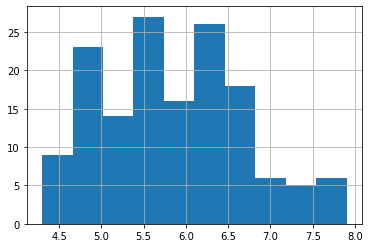

In [109]:
iris_df['SepalLengthCm'].hist()

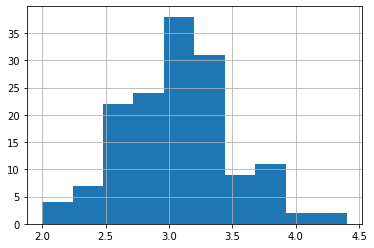

In [110]:
iris_df['SepalWidthCm'].hist()

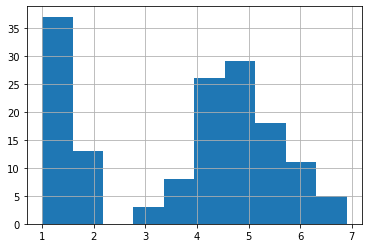

In [112]:
iris_df['PetalLengthCm'].hist()

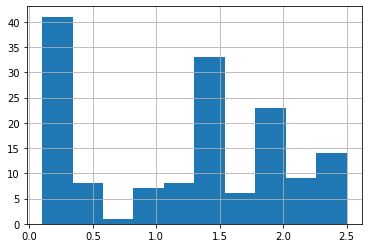

In [113]:
iris_df['PetalWidthCm'].hist()

In [91]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [92]:
from sklearn.cluster import KMeans
wcss = []

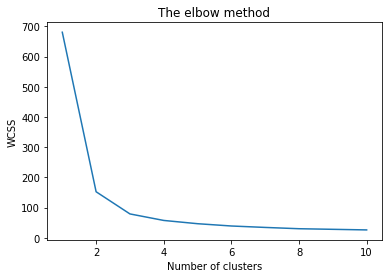

In [93]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

AS the Elbow is projecting between clusters 2 and 4, hence the optimal number of clusters will be 3.

In [94]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

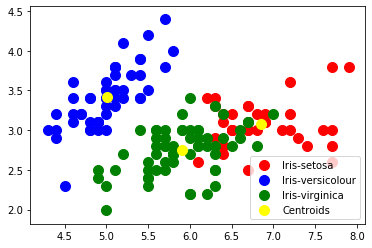

In [95]:
## deriving the scatter plot with the values from the K_means
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Hence No of Cluster identified = 3 and above is the visual representation of the same